In [48]:
import yfinance as yf
import pandas as pd
# pip install yfinance
from pprint import pprint
from pandas_profiling import ProfileReport
import numpy as np
import scipy.stats as st
import plotly.graph_objects as go # for candle chart # next round future
import matplotlib.pyplot as plt
from datetime import datetime # convert timestamp and revese to string
%matplotlib inline
import quantstats as qs


# Time Handler function()1

In [49]:
# from datetime import datetime
def dftimeStaptoString(df):
    df.index.strftime("%Y-%m-%d")
    return df

# Time Handler function()2

In [50]:
def timeHandlerFC(df):
    df=df.assign(year=df.index.year, month=df.index.month,day=df.index.day)
    return df

# DataFrame Time Slicer

In [166]:
# study the index for and datetime libaray
def dataFrameYrselectionFC(df,time):
    df=df.loc[df.index>=time]
    return df

In [167]:
SpyTrimmed2020=SPYadj.copy()
SpyTrimmed2020=dataFrameYrselectionFC(df=SpyTrimmed2020,time='2020-01-01')
SpyTrimmed2020
#perfect just like that, now we can manupulate any time we wanna with lots angels

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02  323.540009  324.890015  322.529999  324.869995  311.117065   
2020-01-03  321.160004  323.640015  321.100006  322.410004  308.761139   
2020-01-06  320.489990  323.730011  320.359985  323.640015  309.939117   
2020-01-07  323.019989  323.540009  322.239990  322.730011  309.067596   
2020-01-08  322.940002  325.779999  322.670013  324.450012  310.714813   
...                ...         ...         ...         ...         ...   
2022-11-28  399.089996  400.809998  395.109985  395.910004  395.910004   
2022-11-29  396.049988  397.299988  393.299988  395.230011  395.230011   
2022-11-30  395.489990  407.679993  393.480011  407.679993  407.679993   
2022-12-01  408.769989  410.000000  404.750000  407.380005  407.380005   
2022-12-02  402.250000  407.859985  402.140015  406.910004  406.910004   

               Volume       Range  
Date                               
2020-01-02   59151200  (324, 325]  
2020-01-03   77709700  (322, 323]  
2020-01-06   55653900  (323, 324]  
2020-01-07   40496400  (322, 323]  
2020-01-08   68296000  (324, 325]  
...               ...         ...  
2022-11-28   67881600  (395, 396]  
2022-11-29   52310000  (395, 396]  
2022-11-30  144566700  (407, 408]  
2022-12-01   76398200  (407, 408]  
2022-12-02   85273900  (406, 407]  

[737 rows x 7 columns]

# Build VolumeOverPriceTool

In [51]:
# df:dataframe from yfinance
#x price interval for underlying price
#n slicer where interval start
#m slicer where interval end
# it build analysis base on close price and sum of the history vloume over price
# seek to find the signficance of price that interpreted by volume
def volumeonPriceintervalFC(df,x,n,m):
    binn=np.arange(0,480,x).tolist()
    result=pd.cut(df['Close'],bins=binn)
    df['Range']=result
    fm=df.groupby(['Range']).sum()['Volume'][n:m]  
    gp=fm.plot(kind='bar')
    return gp,fm
    
    

# Caculate rate of changes

In [52]:
# notice a good way to understand how it work is to write a function.


# Caculate Log Return

# Build Graphic Generator

In [53]:
# note input has to be us stock ticker a commpany wiht ""; eg input="SPY"
# start/end date has to be "YYYY-MM-DD" format
def givemeachart(input,start,end): # is this the dependency not within the function?# notice need to put diff quotation on it
    ticker=yf.Ticker(input)
    Fetched=ticker.history(start=start,end=end)
    plt.figure(figsize=(10,6))
    performance=plt.plot(Fetched['Close'])
    plt.grid()
    plt.show()
# looking for the documentary to define the functions

# Down Load the SPY Data Frame

In [54]:
# While closing price merely refers to the cost of shares at the end of the day, 
#the adjusted closing price considers other factors like dividends, stock splits,
#and new stock offerings. Since the adjusted closing price begins where the closing price ends,
#it can be called a more accurate measure of stocks' value.
SPYadj=yf.download("SPY")
SPYadj

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
1993-01-29   43.968750   43.968750   43.750000   43.937500   25.334024   
1993-02-01   43.968750   44.250000   43.968750   44.250000   25.514212   
1993-02-02   44.218750   44.375000   44.125000   44.343750   25.568275   
1993-02-03   44.406250   44.843750   44.375000   44.812500   25.838543   
1993-02-04   44.968750   45.093750   44.468750   45.000000   25.946648   
...                ...         ...         ...         ...         ...   
2022-11-28  399.089996  400.809998  395.109985  395.910004  395.910004   
2022-11-29  396.049988  397.299988  393.299988  395.230011  395.230011   
2022-11-30  395.489990  407.679993  393.480011  407.679993  407.679993   
2022-12-01  408.769989  410.000000  404.750000  407.380005  407.380005   
2022-12-02  402.250000  407.859985  402.140015  406.910004  406.910004   

               Volume  
Date                   
1993-01-29    1003200  
1993-02-01     480500  
1993-02-02     201300  
1993-02-03     529400  
1993-02-04     531500  
...               ...  
2022-11-28   67881600  
2022-11-29   52310000  
2022-11-30  144566700  
2022-12-01   76398200  
2022-12-02   85273900  

[7517 rows x 6 columns]

In [169]:
#https://www.vanguard.ca/en/advisor/products/products-group/etfs/VCN
CADadj=yf.download("VCN")
CADadj

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- VCN: 1d data not available for startTime=-2208994789 and endTime=1670093019. Only 100 years worth of day granularity data are allowed to be fetched per request.


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []

In [173]:
CADadj=yf.download("FTSE",period='40')
CADadj

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FTSE: No data found, symbol may be delisted


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []

In [175]:
restWord=yf.download("ACWX")
restWord

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2008-04-01  50.910000  51.360001  50.910000  51.360001  36.048756     1100
2008-04-02  51.849998  52.029999  51.849998  51.860001  36.399704     2000
2008-04-03  52.110001  52.360001  52.110001  52.320000  36.722569     1800
2008-04-04  57.549999  57.549999  52.259998  52.450001  36.813805     1700
2008-04-07  52.209999  52.709999  50.820000  52.709999  36.996307      800
...               ...        ...        ...        ...        ...      ...
2022-11-28  45.919998  46.200001  45.610001  45.660000  45.660000  3000800
2022-11-29  45.990002  46.209999  45.860001  45.990002  45.990002  1492500
2022-11-30  46.500000  47.119999  46.119999  46.959999  46.959999  4130100
2022-12-01  47.389999  47.459999  47.000000  47.230000  47.230000  1718400
2022-12-02  46.810001  47.369999  46.799999  47.220001  47.220001  2660400

[3697 rows x 6 columns]

## add FRED API ? https://fred.stlouisfed.org/docs/api/fred/   \
## add TA-LIB for bollinger bands?


In [55]:
qs.extend_pandas() # this is required to pass quantstat to Jupyter

In [56]:
spyqt=qs.utils.download_returns('SPY')
spyqt

Date
1993-01-29 00:00:00-05:00         NaN
1993-02-01 00:00:00-05:00    0.007112
1993-02-02 00:00:00-05:00    0.002119
1993-02-03 00:00:00-05:00    0.010570
1993-02-04 00:00:00-05:00    0.004185
                               ...   
2022-11-28 00:00:00-05:00   -0.015957
2022-11-29 00:00:00-05:00   -0.001718
2022-11-30 00:00:00-05:00    0.031501
2022-12-01 00:00:00-05:00   -0.000736
2022-12-02 00:00:00-05:00   -0.001154
Name: Close, Length: 7517, dtype: float64

In [57]:
#Calculate Sharp
qs.stats.sharpe(spyqt)

0.5865624097138915

In [58]:
spyqt.cagr()

0.09744108025707598

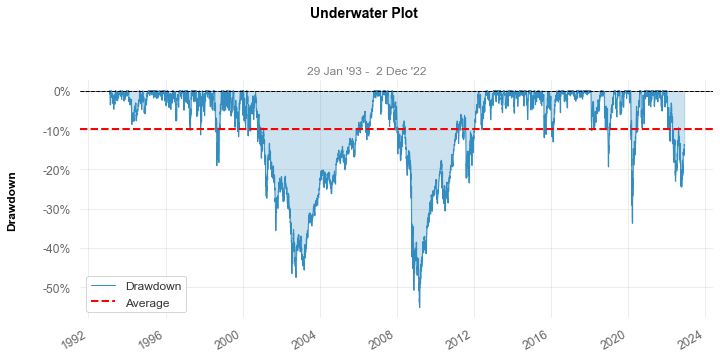

In [59]:
spyqt.plot_drawdown()

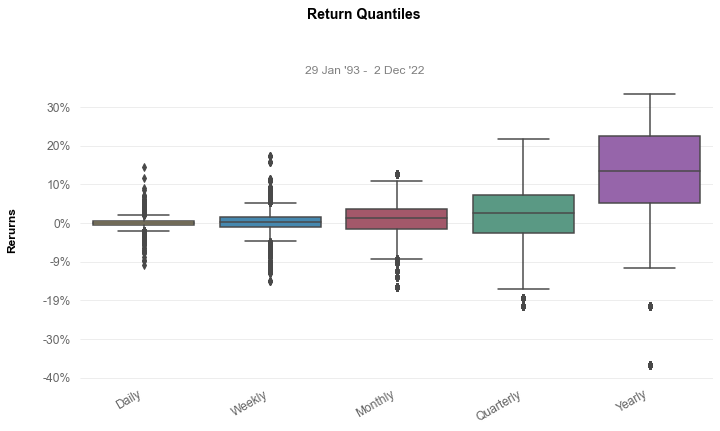

In [60]:
spyqt.plot_distribution()

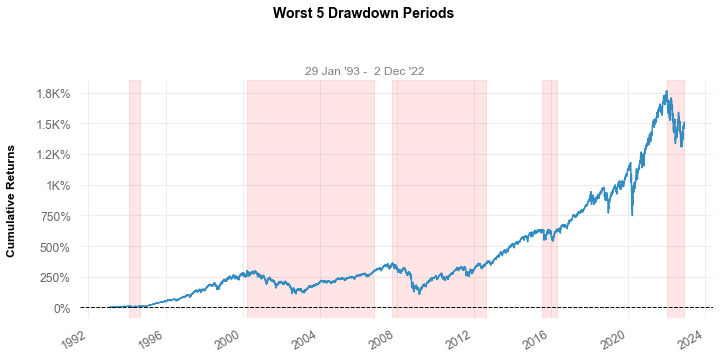

In [61]:
spyqt.plot_drawdowns_periods()

In [62]:
spyqt.monthly_returns()

JAN       FEB       MAR       APR       MAY       JUN       JUL  \
1993  0.000000  0.010668  0.022399 -0.025588  0.026970  0.003607 -0.004854   
1994  0.034876 -0.029164 -0.041902  0.011213  0.015939 -0.022915  0.032326   
1995  0.033608  0.040809  0.027848  0.029622  0.039673  0.020230  0.032165   
1996  0.035579  0.003190  0.017217  0.010870  0.022700  0.008822 -0.044936   
1997  0.061785  0.009566 -0.044123  0.062604  0.063207  0.041103  0.079264   
1998  0.012879  0.069294  0.048783  0.012792 -0.020770  0.042574 -0.013514   
1999  0.035226 -0.032068  0.041467  0.037974 -0.022866  0.055378 -0.031022   
2000 -0.049787 -0.015227  0.096915 -0.035121 -0.015722  0.019682 -0.015703   
2001  0.044459 -0.095388 -0.056037  0.085440 -0.005606 -0.023829 -0.010195   
2002 -0.009799 -0.017936  0.033271 -0.058155 -0.005934 -0.073807 -0.078820   
2003 -0.024595 -0.013479  0.002140  0.084612  0.054836  0.010652  0.018027   
2004  0.019770  0.013571 -0.013246 -0.018921  0.017123  0.018502 -0.032219   
2005 -0.022421  0.020904 -0.018293 -0.018735  0.032224  0.001515  0.038261   
2006  0.024014  0.005725  0.016504  0.012632 -0.030121  0.002608  0.004478   
2007  0.015040 -0.019618  0.011589  0.044296  0.033920 -0.014621 -0.031310   
2008 -0.060461 -0.025843 -0.008942  0.047663  0.015117 -0.083576 -0.008986   
2009 -0.082114 -0.107449  0.083311  0.099346  0.058454 -0.000655  0.074606   
2010 -0.036342  0.031195  0.060880  0.015470 -0.079454 -0.051741  0.068301   
2011  0.023300  0.034737  0.000120  0.028961 -0.011214 -0.016870 -0.020004   
2012  0.046375  0.043405  0.032164 -0.006676 -0.060056  0.040581  0.011830   
2013  0.051190  0.012759  0.037971  0.019212  0.023610 -0.013344  0.051677   
2014 -0.035248  0.045516  0.008296  0.006951  0.023206  0.020645 -0.013437   
2015 -0.029629  0.056205 -0.015705  0.009834  0.012856 -0.020312  0.022589   
2016 -0.049786 -0.000826  0.067266  0.003941  0.017012  0.003476  0.036472   
2017  0.017895  0.039292  0.001250  0.009926  0.014113  0.006375  0.020554   
2018  0.056359 -0.036361 -0.027411  0.005168  0.024309  0.005751  0.037046   
2019  0.080065  0.032416  0.018101  0.040852 -0.063771  0.069586  0.015119   
2020 -0.000404 -0.079166 -0.124871  0.126983  0.047645  0.017734  0.058892   
2021 -0.010191  0.027806  0.045399  0.052911  0.006566  0.022427  0.024413   
2022 -0.052741 -0.029517  0.037590 -0.087769  0.002257 -0.082460  0.092087   

           AUG       SEP       OCT           NOV       DEC       EOY  
1993  0.038327 -0.007276  0.019728 -1.067397e-02  0.012277  0.087091  
1994  0.038121 -0.025255  0.028427 -3.981638e-02  0.007282  0.003973  
1995  0.004452  0.042377 -0.002939  4.448075e-02  0.015732  0.380489  
1996  0.019259  0.055873  0.032331  7.300405e-02 -0.023797  0.224975  
1997 -0.051803  0.048091 -0.024504  3.869726e-02  0.019071  0.334751  
1998 -0.141180  0.063640  0.081081  5.568166e-02  0.065422  0.286925  
1999 -0.005179 -0.022337  0.064078  1.665128e-02  0.057110  0.203894  
2000  0.065341 -0.054862 -0.004678 -7.465349e-02 -0.005226 -0.097415  
2001 -0.059333 -0.081631  0.013022  7.797734e-02  0.005639 -0.117585  
2002  0.006801 -0.104852  0.082283  6.168150e-02 -0.056570 -0.215846  
2003  0.020626 -0.010907  0.053527  1.092129e-02  0.050313  0.281816  
2004  0.002436  0.010037  0.012885  4.451697e-02  0.030121  0.106979  
2005 -0.009375  0.008026 -0.023651  4.395259e-02 -0.001913  0.048283  
2006  0.021823  0.027001  0.031517  1.988531e-02  0.013371  0.158452  
2007  0.012833  0.038714  0.013567 -3.873263e-02 -0.011261  0.051462  
2008  0.015454 -0.094173 -0.165187 -6.960638e-02  0.009796 -0.367950  
2009  0.036940  0.035457 -0.019226  6.160720e-02  0.019101  0.263518  
2010 -0.044981  0.089555  0.038202 -2.220446e-16  0.066853  0.150562  
2011 -0.054976 -0.069421  0.109147 -4.063611e-03  0.010448  0.018949  
2012  0.025053  0.025351 -0.018198  5.659525e-03  0.008935  0.159904  
2013 -0.029992  0.031646  0.046307  2.963773e-02  0.025926  0.323077  
2014  0.039463 -0.013796  0.02

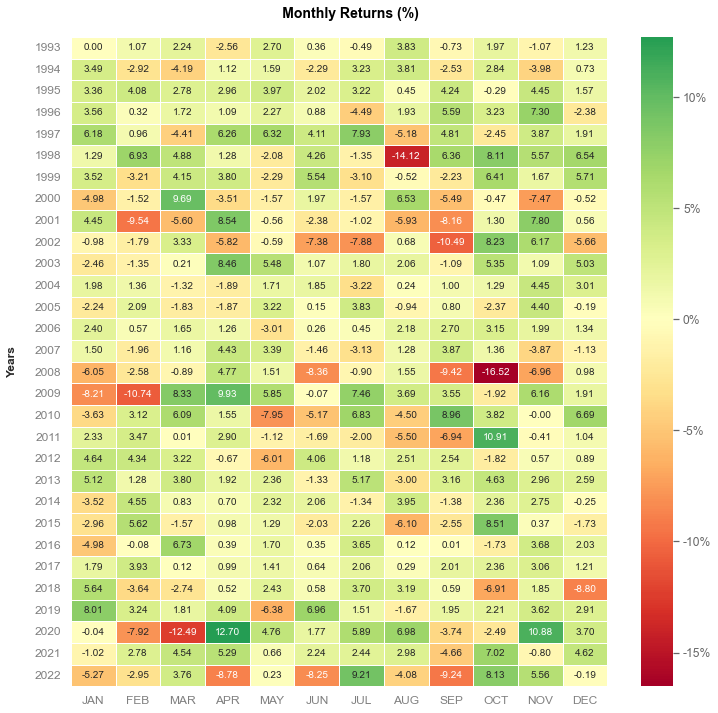

In [63]:
spyqt.plot_monthly_heatmap()

In [64]:
spyqt.max_drawdown()

-0.5518943362839157

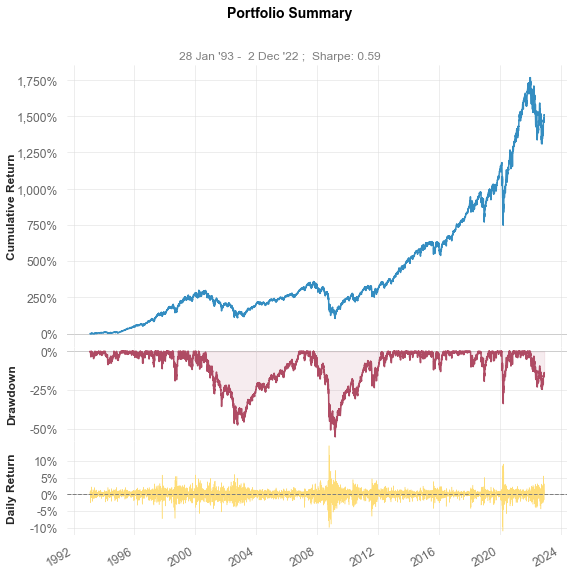

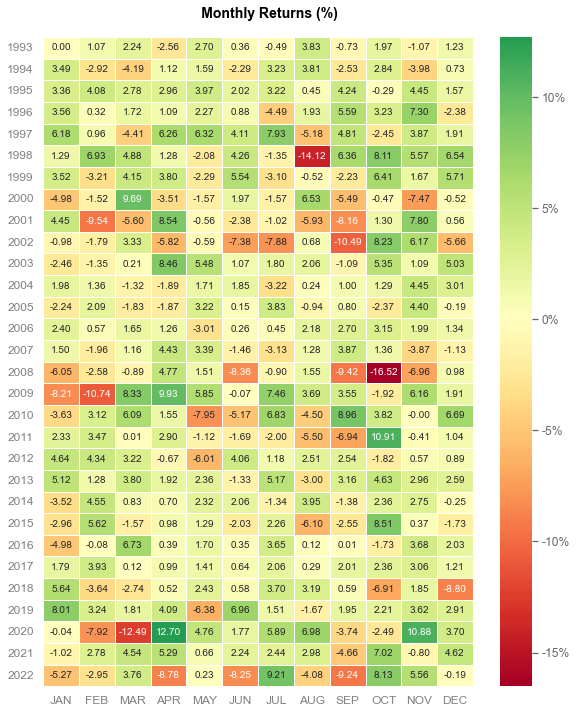

In [65]:
#qs.reports.html(spyqt,output='fileloaction/spyreport.html')
qs.reports.plots(spyqt) # we can save as internet link format as well 

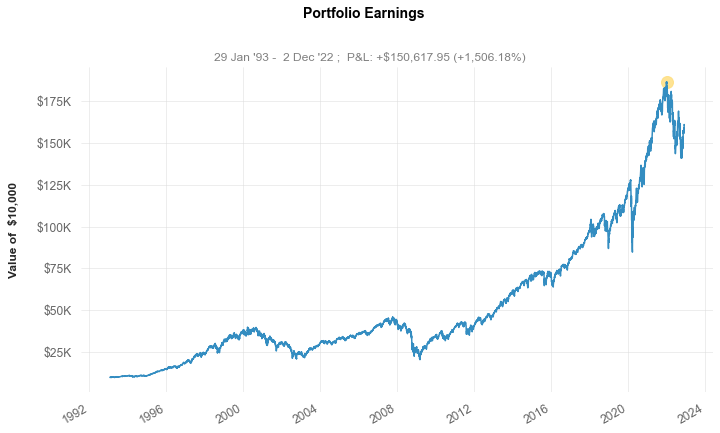

In [66]:
spyqt.plot_earnings(start_balance=10000) # once qs pandas extend initiate all additional function rdy
# (savefig='filelocation') --can save the graph for ppt

In [47]:
tickers={"SSO":0.3,"GOF":0.2,"BRW":0.2,"TLT":0.3}
profo=qs.utils.make_index(tickers)
qs.reports.html(profo,'SPY',output="profo.html")

D:\ANACODA\lib\site-packages\quantstats\utils.py:394: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return index[index.index <= last_day].sum(axis=1)


TypeError: Invalid comparison between dtype=datetime64[ns, America/New_York] and datetime

In [67]:
SPYadj.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7517 entries, 1993-01-29 to 2022-12-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7517 non-null   float64
 1   High       7517 non-null   float64
 2   Low        7517 non-null   float64
 3   Close      7517 non-null   float64
 4   Adj Close  7517 non-null   float64
 5   Volume     7517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 411.1 KB


In [68]:
SPYadj.dropna()

Open        High         Low       Close   Adj Close  \
Date                                                                     
1993-01-29   43.968750   43.968750   43.750000   43.937500   25.334024   
1993-02-01   43.968750   44.250000   43.968750   44.250000   25.514212   
1993-02-02   44.218750   44.375000   44.125000   44.343750   25.568275   
1993-02-03   44.406250   44.843750   44.375000   44.812500   25.838543   
1993-02-04   44.968750   45.093750   44.468750   45.000000   25.946648   
...                ...         ...         ...         ...         ...   
2022-11-28  399.089996  400.809998  395.109985  395.910004  395.910004   
2022-11-29  396.049988  397.299988  393.299988  395.230011  395.230011   
2022-11-30  395.489990  407.679993  393.480011  407.679993  407.679993   
2022-12-01  408.769989  410.000000  404.750000  407.380005  407.380005   
2022-12-02  402.250000  407.859985  402.140015  406.910004  406.910004   

               Volume  
Date                   
1993-01-29    1003200  
1993-02-01     480500  
1993-02-02     201300  
1993-02-03     529400  
1993-02-04     531500  
...               ...  
2022-11-28   67881600  
2022-11-29   52310000  
2022-11-30  144566700  
2022-12-01   76398200  
2022-12-02   85273900  

[7517 rows x 6 columns]

In [69]:
# note checked the time of data is time-stamp; hence it will be way easier to convert UTC format
SPYadj.index[0]

Timestamp('1993-01-29 00:00:00')

In [70]:
SPYadj.assign(year=SPYadj.index.year, month=SPYadj.index.month,day=SPYadj.index.day)

Open        High         Low       Close   Adj Close  \
Date                                                                     
1993-01-29   43.968750   43.968750   43.750000   43.937500   25.334024   
1993-02-01   43.968750   44.250000   43.968750   44.250000   25.514212   
1993-02-02   44.218750   44.375000   44.125000   44.343750   25.568275   
1993-02-03   44.406250   44.843750   44.375000   44.812500   25.838543   
1993-02-04   44.968750   45.093750   44.468750   45.000000   25.946648   
...                ...         ...         ...         ...         ...   
2022-11-28  399.089996  400.809998  395.109985  395.910004  395.910004   
2022-11-29  396.049988  397.299988  393.299988  395.230011  395.230011   
2022-11-30  395.489990  407.679993  393.480011  407.679993  407.679993   
2022-12-01  408.769989  410.000000  404.750000  407.380005  407.380005   
2022-12-02  402.250000  407.859985  402.140015  406.910004  406.910004   

               Volume  year  month  day  
Date                                     
1993-01-29    1003200  1993      1   29  
1993-02-01     480500  1993      2    1  
1993-02-02     201300  1993      2    2  
1993-02-03     529400  1993      2    3  
1993-02-04     531500  1993      2    4  
...               ...   ...    ...  ...  
2022-11-28   67881600  2022     11   28  
2022-11-29   52310000  2022     11   29  
2022-11-30  144566700  2022     11   30  
2022-12-01   76398200  2022     12    1  
2022-12-02   85273900  2022     12    2  

[7517 rows x 9 columns]

In [71]:
SPYadj.reset_index()

Date        Open        High         Low       Close   Adj Close  \
0    1993-01-29   43.968750   43.968750   43.750000   43.937500   25.334024   
1    1993-02-01   43.968750   44.250000   43.968750   44.250000   25.514212   
2    1993-02-02   44.218750   44.375000   44.125000   44.343750   25.568275   
3    1993-02-03   44.406250   44.843750   44.375000   44.812500   25.838543   
4    1993-02-04   44.968750   45.093750   44.468750   45.000000   25.946648   
...         ...         ...         ...         ...         ...         ...   
7512 2022-11-28  399.089996  400.809998  395.109985  395.910004  395.910004   
7513 2022-11-29  396.049988  397.299988  393.299988  395.230011  395.230011   
7514 2022-11-30  395.489990  407.679993  393.480011  407.679993  407.679993   
7515 2022-12-01  408.769989  410.000000  404.750000  407.380005  407.380005   
7516 2022-12-02  402.250000  407.859985  402.140015  406.910004  406.910004   

         Volume  
0       1003200  
1        480500  
2        201300  
3        529400  
4        531500  
...         ...  
7512   67881600  
7513   52310000  
7514  144566700  
7515   76398200  
7516   85273900  

[7517 rows x 7 columns]

In [72]:
split("1993-01-29",'-')

NameError: name 'split' is not defined

In [73]:
fig=go.Figure(data=[go.Candlestick(x=SPYadj['Date'],open=SPYadj['Open'],high=SPYadj['High'],low=SPYadj['Low'],
                                  close=SPYadj['close'])
                 

SyntaxError: unexpected EOF while parsing (570857551.py, line 3)

<AxesSubplot:xlabel='Range'>

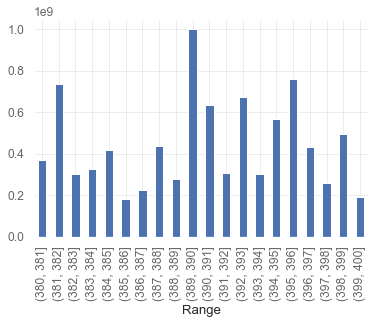

In [155]:
volumeonPriceintervalFC(df=SPYadj,x=1,n=380,m=400)

In [74]:
var_spymaxperiod=np.var(SPYadj['Adj Close'])
std_spymaxperiod=np.std(SPYadj['Adj Close'])
mean_spymaxperiod=np.mean(SPYadj['Adj Close'])

In [75]:
print(f"Roughly 68% among {mean_spymaxperiod-std_spymaxperiod*1} and {mean_spymaxperiod+std_spymaxperiod*1}")
print(f"Roughly 95% among {(mean_spymaxperiod-std_spymaxperiod*2)} and {mean_spymaxperiod+std_spymaxperiod*2}")
print(f"Roughly 99.7% among {mean_spymaxperiod-std_spymaxperiod*3} and {mean_spymaxperiod+std_spymaxperiod*3}")

Roughly 68% among 31.7586824972163 and 237.6626792699526
Roughly 95% among -71.19331588915185 and 340.61467765632074
Roughly 99.7% among -174.14531427552 and 443.56667604268887


In [76]:
print(f"Roughly 68% among {mean_spymaxperiod-std_spymaxperiod*1} and {mean_spymaxperiod+std_spymaxperiod*1}")
print(f"Roughly 95% among 0 and {mean_spymaxperiod+std_spymaxperiod*2}")
print(f"Roughly 99.7% among 0 and {mean_spymaxperiod+std_spymaxperiod*3}")

Roughly 68% among 31.7586824972163 and 237.6626792699526
Roughly 95% among 0 and 340.61467765632074
Roughly 99.7% among 0 and 443.56667604268887


In [77]:
st.normaltest(SPYadj['Adj Close'].sample(1000))

NormaltestResult(statistic=232.546288314074, pvalue=3.1857749940560284e-51)

In [78]:
zSpyMaxperiod=st.zscore(SPYadj['Adj Close'])

In [79]:
spy=yf.Ticker('SPY')
type(spy)

yfinance.ticker.Ticker

In [80]:
spy.info

{'exchange': 'PCX',
 'shortName': 'SPDR S&P 500',
 'longName': 'SPDR S&P 500 ETF Trust',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EST',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '-18000000',
 'quoteType': 'ETF',
 'symbol': 'SPY',
 'messageBoardId': 'finmb_6160262',
 'market': 'us_market',
 'annualHoldingsTurnover': None,
 'enterpriseToRevenue': None,
 'beta3Year': 1,
 'profitMargins': None,
 'enterpriseToEbitda': None,
 '52WeekChange': None,
 'morningStarRiskRating': None,
 'forwardEps': None,
 'revenueQuarterlyGrowth': None,
 'fundInceptionDate': 727660800,
 'annualReportExpenseRatio': None,
 'totalAssets': 367353823232,
 'bookValue': None,
 'fundFamily': 'SPDR State Street Global Advisors',
 'lastFiscalYearEnd': None,
 'netIncomeToCommon': None,
 'trailingEps': None,
 'lastDividendValue': None,
 'SandP52WeekChange': None,
 'priceToBook': None,
 'nextFiscalYearEnd': None,
 'yield': 0.016,
 'mostRecentQuarter': None,
 'enterpriseValue': None

In [81]:
spy.splits

Series([], Name: Stock Splits, dtype: int64)

In [82]:
spy.info.keys() # show higher level frame, see what we can do about it

dict_keys(['exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'quoteType', 'symbol', 'messageBoardId', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'profitMargins', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskRating', 'forwardEps', 'revenueQuarterlyGrowth', 'fundInceptionDate', 'annualReportExpenseRatio', 'totalAssets', 'bookValue', 'fundFamily', 'lastFiscalYearEnd', 'netIncomeToCommon', 'trailingEps', 'lastDividendValue', 'SandP52WeekChange', 'priceToBook', 'nextFiscalYearEnd', 'yield', 'mostRecentQuarter', 'enterpriseValue', 'priceHint', 'threeYearAverageReturn', 'lastSplitDate', 'lastSplitFactor', 'legalType', 'lastDividendDate', 'morningStarOverallRating', 'earningsQuarterlyGrowth', 'priceToSalesTrailing12Months', 'pegRatio', 'ytdReturn', 'forwardPE', 'maxAge', 'lastCapGain', 'category', 'fiveYearAverageReturn', 'phone', 'longBusinessSummary', 'companyOfficers', 'p

In [83]:
# clean data
# deal with time serials of data

In [84]:
spy.institutional_holders

0           1
0              Net Assets     367.35B
1                     NAV      395.94
2          PE Ratio (TTM)       22.08
3                   Yield       1.60%
4  YTD Daily Total Return     -15.77%
5       Beta (5Y Monthly)        1.00
6     Expense Ratio (net)       0.09%
7          Inception Date  1993-01-22

In [85]:
spy.earnings_history # need to fetch from bloomberg?

Symbol                 Company           Earnings Date  EPS Estimate  \
0     SPY  SPDR S&P 500 ETF Trust  Nov 29, 2017, 12 PMEST           NaN   
1     SPY  SPDR S&P 500 ETF Trust   Aug 15, 2017, 1 PMEDT           NaN   
2     SPY  SPDR S&P 500 ETF Trust   May 15, 2017, 1 PMEDT           NaN   
3     SPY  SPDR S&P 500 ETF Trust  Feb 15, 2017, 12 PMEST           NaN   
4     SPY  SPDR S&P 500 ETF Trust  Nov 28, 2016, 12 PMEST           NaN   
5     SPY  SPDR S&P 500 ETF Trust   Aug 15, 2016, 1 PMEDT           NaN   
6     SPY  SPDR S&P 500 ETF Trust   May 15, 2016, 1 PMEDT           NaN   
7     SPY  SPDR S&P 500 ETF Trust  Feb 15, 2016, 12 PMEST           NaN   
8     SPY  SPDR S&P 500 ETF Trust  May 15, 2006, 12 AMEDT          2.11   
9     SPY  SPDR S&P 500 ETF Trust  Feb 15, 2006, 12 AMEST          2.02   
10    SPY  SPDR S&P 500 ETF Trust  May 15, 2005, 12 AMEDT          1.83   
11    SPY  SPDR S&P 500 ETF Trust   Feb 15, 2005, 8 AMEST           NaN   

    Reported EPS  Surprise(%)  
0            NaN          NaN  
1            NaN          NaN  
2            NaN          NaN  
3            NaN          NaN  
4            NaN          NaN  
5            NaN          NaN  
6            NaN          NaN  
7            NaN          NaN  
8            NaN          NaN  
9            NaN          NaN  
10           NaN          NaN  
11          1.81          NaN

In [86]:
FetchedSpy=spy.history(period='max')

In [87]:
print(spy.history(period='max'))

                                 Open        High         Low       Close  \
Date                                                                        
1993-01-29 00:00:00-05:00   25.352030   25.352030   25.225900   25.334011   
1993-02-01 00:00:00-05:00   25.352051   25.514217   25.352051   25.514217   
1993-02-02 00:00:00-05:00   25.496205   25.586298   25.442150   25.568279   
1993-02-03 00:00:00-05:00   25.604295   25.856554   25.586276   25.838535   
1993-02-04 00:00:00-05:00   25.928639   26.000713   25.640342   25.946657   
...                               ...         ...         ...         ...   
2022-11-28 00:00:00-05:00  399.089996  400.809998  395.109985  395.910004   
2022-11-29 00:00:00-05:00  396.049988  397.299988  393.299988  395.230011   
2022-11-30 00:00:00-05:00  395.489990  407.679993  393.480011  407.679993   
2022-12-01 00:00:00-05:00  408.769989  410.000000  404.750000  407.380005   
2022-12-02 00:00:00-05:00  402.250000  407.859985  402.140015  406.910004   

In [88]:
FetchedSpy.to_csv("SPYoutPut.csv")

In [89]:
df=spy.dividends
df


Date
1993-03-19 00:00:00-05:00    0.213
1993-06-18 00:00:00-04:00    0.318
1993-09-17 00:00:00-04:00    0.286
1993-12-17 00:00:00-05:00    0.317
1994-03-18 00:00:00-05:00    0.271
                             ...  
2021-09-17 00:00:00-04:00    1.428
2021-12-17 00:00:00-05:00    1.633
2022-03-18 00:00:00-04:00    1.366
2022-06-17 00:00:00-04:00    1.577
2022-09-16 00:00:00-04:00    1.596
Name: Dividends, Length: 120, dtype: float64

In [90]:
pprint(spy.info)

{'52WeekChange': None,
 'SandP52WeekChange': None,
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 405.97,
 'askSize': 1100,
 'averageDailyVolume10Day': 72969310,
 'averageVolume': 91311903,
 'averageVolume10days': 72969310,
 'beta': None,
 'beta3Year': 1,
 'bid': 405.92,
 'bidSize': 800,
 'bondHoldings': {'creditQuality': None,
                  'creditQualityCat': None,
                  'duration': None,
                  'durationCat': None,
                  'maturity': None,
                  'maturityCat': None},
 'bondPosition': 0,
 'bondRatings': [{'bb': 0},
                 {'aa': 0},
                 {'aaa': 0},
                 {'a': 0},
                 {'other': 0},
                 {'b': 0},
                 {'bbb': 0},
                 {'below_b': 0},
                 {'us_government': 0}],
 'bookValue': None,
 'cashPosition': None,
 'category': 'Large Blend',
 'circulatingSupply': None,
 'coinMarketCapLink': None,
 'compa

In [91]:
IndexPE=spy.info['equityHoldings']['priceToEarnings']
IndexPE

18.43

In [92]:
# for key,value in stockinfo.items():
#    print(key,':',value)
df=spy.dividends
dff=df.to_frame()
dff

Dividends
Date                                
1993-03-19 00:00:00-05:00      0.213
1993-06-18 00:00:00-04:00      0.318
1993-09-17 00:00:00-04:00      0.286
1993-12-17 00:00:00-05:00      0.317
1994-03-18 00:00:00-05:00      0.271
...                              ...
2021-09-17 00:00:00-04:00      1.428
2021-12-17 00:00:00-05:00      1.633
2022-03-18 00:00:00-04:00      1.366
2022-06-17 00:00:00-04:00      1.577
2022-09-16 00:00:00-04:00      1.596

[120 rows x 1 columns]

In [93]:
dir(df) # study these method for fun?

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__redu

In [94]:
data=df.resample('Y').sum()
data

Date
1993-12-31 00:00:00-05:00    1.134
1994-12-31 00:00:00-05:00    1.227
1995-12-31 00:00:00-05:00    1.278
1996-12-31 00:00:00-05:00    1.355
1997-12-31 00:00:00-05:00    1.377
1998-12-31 00:00:00-05:00    1.416
1999-12-31 00:00:00-05:00    1.445
2000-12-31 00:00:00-05:00    1.505
2001-12-31 00:00:00-05:00    1.424
2002-12-31 00:00:00-05:00    1.498
2003-12-31 00:00:00-05:00    1.630
2004-12-31 00:00:00-05:00    2.197
2005-12-31 00:00:00-05:00    2.149
2006-12-31 00:00:00-05:00    2.446
2007-12-31 00:00:00-05:00    2.701
2008-12-31 00:00:00-05:00    2.721
2009-12-31 00:00:00-05:00    2.177
2010-12-31 00:00:00-05:00    2.266
2011-12-31 00:00:00-05:00    2.576
2012-12-31 00:00:00-05:00    3.103
2013-12-31 00:00:00-05:00    3.351
2014-12-31 00:00:00-05:00    3.836
2015-12-31 00:00:00-05:00    4.206
2016-12-31 00:00:00-05:00    4.539
2017-12-31 00:00:00-05:00    4.802
2018-12-31 00:00:00-05:00    5.101
2019-12-31 00:00:00-05:00    5.619
2020-12-31 00:00:00-05:00    5.691
2021-12-31 00:0

In [95]:
dff2=dff.reset_index()['Date'].dt.year # try how to split them further
dff2

0      1993
1      1993
2      1993
3      1993
4      1994
       ... 
115    2021
116    2021
117    2022
118    2022
119    2022
Name: Date, Length: 120, dtype: int64

In [96]:
FetchedSpy

Open        High         Low       Close  \
Date                                                                        
1993-01-29 00:00:00-05:00   25.352056   25.352056   25.225927   25.334038   
1993-02-01 00:00:00-05:00   25.352039   25.514206   25.352039   25.514206   
1993-02-02 00:00:00-05:00   25.496201   25.586294   25.442146   25.568275   
1993-02-03 00:00:00-05:00   25.604302   25.856561   25.586284   25.838543   
1993-02-04 00:00:00-05:00   25.928639   26.000713   25.640342   25.946657   
...                               ...         ...         ...         ...   
2022-11-28 00:00:00-05:00  399.089996  400.809998  395.109985  395.910004   
2022-11-29 00:00:00-05:00  396.049988  397.299988  393.299988  395.230011   
2022-11-30 00:00:00-05:00  395.489990  407.679993  393.480011  407.679993   
2022-12-01 00:00:00-05:00  408.769989  410.000000  404.750000  407.380005   
2022-12-02 00:00:00-05:00  402.250000  407.859985  402.140015  406.910004   

                              Volume  Dividends  Stock Splits  
Date                                                           
1993-01-29 00:00:00-05:00    1003200        0.0             0  
1993-02-01 00:00:00-05:00     480500        0.0             0  
1993-02-02 00:00:00-05:00     201300        0.0             0  
1993-02-03 00:00:00-05:00     529400        0.0             0  
1993-02-04 00:00:00-05:00     531500        0.0             0  
...                              ...        ...           ...  
2022-11-28 00:00:00-05:00   67881600        0.0             0  
2022-11-29 00:00:00-05:00   52310000        0.0             0  
2022-11-30 00:00:00-05:00  144566700        0.0             0  
2022-12-01 00:00:00-05:00   76398200        0.0             0  
2022-12-02 00:00:00-05:00   85273900        0.0             0  

[7517 rows x 7 columns]

In [97]:
FetchedSpy.shift(1)

Open        High         Low       Close  \
Date                                                                        
1993-01-29 00:00:00-05:00         NaN         NaN         NaN         NaN   
1993-02-01 00:00:00-05:00   25.352056   25.352056   25.225927   25.334038   
1993-02-02 00:00:00-05:00   25.352039   25.514206   25.352039   25.514206   
1993-02-03 00:00:00-05:00   25.496201   25.586294   25.442146   25.568275   
1993-02-04 00:00:00-05:00   25.604302   25.856561   25.586284   25.838543   
...                               ...         ...         ...         ...   
2022-11-28 00:00:00-05:00  401.829987  402.910004  401.540009  402.329987   
2022-11-29 00:00:00-05:00  399.089996  400.809998  395.109985  395.910004   
2022-11-30 00:00:00-05:00  396.049988  397.299988  393.299988  395.230011   
2022-12-01 00:00:00-05:00  395.489990  407.679993  393.480011  407.679993   
2022-12-02 00:00:00-05:00  408.769989  410.000000  404.750000  407.380005   

                                Volume  Dividends  Stock Splits  
Date                                                             
1993-01-29 00:00:00-05:00          NaN        NaN           NaN  
1993-02-01 00:00:00-05:00    1003200.0        0.0           0.0  
1993-02-02 00:00:00-05:00     480500.0        0.0           0.0  
1993-02-03 00:00:00-05:00     201300.0        0.0           0.0  
1993-02-04 00:00:00-05:00     529400.0        0.0           0.0  
...                                ...        ...           ...  
2022-11-28 00:00:00-05:00   30545400.0        0.0           0.0  
2022-11-29 00:00:00-05:00   67881600.0        0.0           0.0  
2022-11-30 00:00:00-05:00   52310000.0        0.0           0.0  
2022-12-01 00:00:00-05:00  144566700.0        0.0           0.0  
2022-12-02 00:00:00-05:00   76398200.0        0.0           0.0  

[7517 rows x 7 columns]

In [98]:
FetchedSpy.describe()

Open         High          Low        Close        Volume  \
count  7517.000000  7517.000000  7517.000000  7517.000000  7.517000e+03   
mean    134.706023   135.514853   133.811784   134.710681  8.456658e+07   
std     102.944288   103.531706   102.299665   102.958847  9.388298e+07   
min      25.027709    25.099778    24.685364    25.027716  5.200000e+03   
25%      71.133206    71.712257    70.429448    71.116356  9.058900e+06   
50%      93.931806    94.571975    93.131377    93.935997  6.137110e+07   
75%     179.103754   179.797183   178.243808   179.067032  1.184544e+08   
max     473.735036   474.486347   470.611169   472.242310  8.710263e+08   

         Dividends  Stock Splits  
count  7517.000000        7517.0  
mean      0.011311           0.0  
std       0.102131           0.0  
min       0.000000           0.0  
25%       0.000000           0.0  
50%       0.000000           0.0  
75%       0.000000           0.0  
max       1.633000           0.0

In [99]:
FetchedSpy['Close'].max()

472.2423095703125

In [100]:
volumefeedMaxperiod=FetchedSpy.groupby(['Close']).sum()['Volume']
volumefeedMaxperiod=volumefeedMaxperiod.reset_index()
volumefeedMaxperiod

Close    Volume
0      25.027716    378100
1      25.045723    210900
2      25.063745    374800
3      25.117802     34900
4      25.145918     62600
...          ...       ...
7083  471.411896  47274600
7084  471.797485  56808600
7085  472.014954  54503000
7086  472.084137  71178700
7087  472.242310  72668200

[7088 rows x 2 columns]

In [101]:
pricingbin=[0,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475]
labels=["0~25","25~50","50~75","75~100","100~125","125~150","150~175","175~200","200~225","225~250",
      "250~275","275~300","300~325","325~350","350~375","375~400","400~425","425~450","450~int(FetchedSpy['Close'].max())"]
volumeOverpricelabels=pd.cut(volumefeedMaxperiod['Close'],bins=pricingbin)
volumeOverpricelabels

0         (25, 50]
1         (25, 50]
2         (25, 50]
3         (25, 50]
4         (25, 50]
           ...    
7083    (450, 475]
7084    (450, 475]
7085    (450, 475]
7086    (450, 475]
7087    (450, 475]
Name: Close, Length: 7088, dtype: category
Categories (19, interval[int64, right]): [(0, 25] < (25, 50] < (50, 75] < (75, 100] ... (375, 400] < (400, 425] < (425, 450] < (450, 475]]

In [102]:
volumefeedMaxperiod['StockRange']=volumeOverpricelabels
volumefeedMaxperiod

Close    Volume  StockRange
0      25.027716    378100    (25, 50]
1      25.045723    210900    (25, 50]
2      25.063745    374800    (25, 50]
3      25.117802     34900    (25, 50]
4      25.145918     62600    (25, 50]
...          ...       ...         ...
7083  471.411896  47274600  (450, 475]
7084  471.797485  56808600  (450, 475]
7085  472.014954  54503000  (450, 475]
7086  472.084137  71178700  (450, 475]
7087  472.242310  72668200  (450, 475]

[7088 rows x 3 columns]

<AxesSubplot:xlabel='StockRange'>

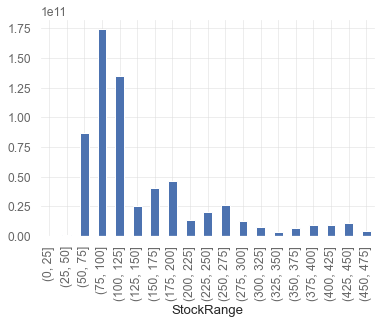

In [103]:
pricevolumeforPlot=volumefeedMaxperiod.groupby(['StockRange']).sum()['Volume']
pricevolumeforPlot.plot(kind='bar')

<AxesSubplot:xlabel='Date'>

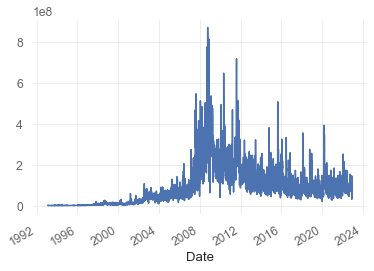

In [104]:
FetchedSpy['Volume'].plot() 

<AxesSubplot:xlabel='StockRange'>

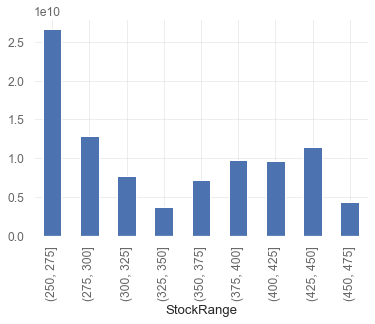

In [147]:
closerlookvolume=pricevolumeforPlot.loc[pricevolumeforPlot.index[10:]]
closerlookvolume.plot(kind='bar')


In [106]:
byunit10=np.linspace(start=0,stop=480,num=49)
byunit10

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
       220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
       330., 340., 350., 360., 370., 380., 390., 400., 410., 420., 430.,
       440., 450., 460., 470., 480.])

In [107]:
FetchedSpy

Open        High         Low       Close  \
Date                                                                        
1993-01-29 00:00:00-05:00   25.352056   25.352056   25.225927   25.334038   
1993-02-01 00:00:00-05:00   25.352039   25.514206   25.352039   25.514206   
1993-02-02 00:00:00-05:00   25.496201   25.586294   25.442146   25.568275   
1993-02-03 00:00:00-05:00   25.604302   25.856561   25.586284   25.838543   
1993-02-04 00:00:00-05:00   25.928639   26.000713   25.640342   25.946657   
...                               ...         ...         ...         ...   
2022-11-28 00:00:00-05:00  399.089996  400.809998  395.109985  395.910004   
2022-11-29 00:00:00-05:00  396.049988  397.299988  393.299988  395.230011   
2022-11-30 00:00:00-05:00  395.489990  407.679993  393.480011  407.679993   
2022-12-01 00:00:00-05:00  408.769989  410.000000  404.750000  407.380005   
2022-12-02 00:00:00-05:00  402.250000  407.859985  402.140015  406.910004   

                              Volume  Dividends  Stock Splits  
Date                                                           
1993-01-29 00:00:00-05:00    1003200        0.0             0  
1993-02-01 00:00:00-05:00     480500        0.0             0  
1993-02-02 00:00:00-05:00     201300        0.0             0  
1993-02-03 00:00:00-05:00     529400        0.0             0  
1993-02-04 00:00:00-05:00     531500        0.0             0  
...                              ...        ...           ...  
2022-11-28 00:00:00-05:00   67881600        0.0             0  
2022-11-29 00:00:00-05:00   52310000        0.0             0  
2022-11-30 00:00:00-05:00  144566700        0.0             0  
2022-12-01 00:00:00-05:00   76398200        0.0             0  
2022-12-02 00:00:00-05:00   85273900        0.0             0  

[7517 rows x 7 columns]

In [108]:
np.arange(0,480,1)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [109]:
FetchedSpy

Open        High         Low       Close  \
Date                                                                        
1993-01-29 00:00:00-05:00   25.352056   25.352056   25.225927   25.334038   
1993-02-01 00:00:00-05:00   25.352039   25.514206   25.352039   25.514206   
1993-02-02 00:00:00-05:00   25.496201   25.586294   25.442146   25.568275   
1993-02-03 00:00:00-05:00   25.604302   25.856561   25.586284   25.838543   
1993-02-04 00:00:00-05:00   25.928639   26.000713   25.640342   25.946657   
...                               ...         ...         ...         ...   
2022-11-28 00:00:00-05:00  399.089996  400.809998  395.109985  395.910004   
2022-11-29 00:00:00-05:00  396.049988  397.299988  393.299988  395.230011   
2022-11-30 00:00:00-05:00  395.489990  407.679993  393.480011  407.679993   
2022-12-01 00:00:00-05:00  408.769989  410.000000  404.750000  407.380005   
2022-12-02 00:00:00-05:00  402.250000  407.859985  402.140015  406.910004   

                              Volume  Dividends  Stock Splits  
Date                                                           
1993-01-29 00:00:00-05:00    1003200        0.0             0  
1993-02-01 00:00:00-05:00     480500        0.0             0  
1993-02-02 00:00:00-05:00     201300        0.0             0  
1993-02-03 00:00:00-05:00     529400        0.0             0  
1993-02-04 00:00:00-05:00     531500        0.0             0  
...                              ...        ...           ...  
2022-11-28 00:00:00-05:00   67881600        0.0             0  
2022-11-29 00:00:00-05:00   52310000        0.0             0  
2022-11-30 00:00:00-05:00  144566700        0.0             0  
2022-12-01 00:00:00-05:00   76398200        0.0             0  
2022-12-02 00:00:00-05:00   85273900        0.0             0  

[7517 rows x 7 columns]

In [110]:
FetchedSpy

Open        High         Low       Close  \
Date                                                                        
1993-01-29 00:00:00-05:00   25.352056   25.352056   25.225927   25.334038   
1993-02-01 00:00:00-05:00   25.352039   25.514206   25.352039   25.514206   
1993-02-02 00:00:00-05:00   25.496201   25.586294   25.442146   25.568275   
1993-02-03 00:00:00-05:00   25.604302   25.856561   25.586284   25.838543   
1993-02-04 00:00:00-05:00   25.928639   26.000713   25.640342   25.946657   
...                               ...         ...         ...         ...   
2022-11-28 00:00:00-05:00  399.089996  400.809998  395.109985  395.910004   
2022-11-29 00:00:00-05:00  396.049988  397.299988  393.299988  395.230011   
2022-11-30 00:00:00-05:00  395.489990  407.679993  393.480011  407.679993   
2022-12-01 00:00:00-05:00  408.769989  410.000000  404.750000  407.380005   
2022-12-02 00:00:00-05:00  402.250000  407.859985  402.140015  406.910004   

                              Volume  Dividends  Stock Splits  
Date                                                           
1993-01-29 00:00:00-05:00    1003200        0.0             0  
1993-02-01 00:00:00-05:00     480500        0.0             0  
1993-02-02 00:00:00-05:00     201300        0.0             0  
1993-02-03 00:00:00-05:00     529400        0.0             0  
1993-02-04 00:00:00-05:00     531500        0.0             0  
...                              ...        ...           ...  
2022-11-28 00:00:00-05:00   67881600        0.0             0  
2022-11-29 00:00:00-05:00   52310000        0.0             0  
2022-11-30 00:00:00-05:00  144566700        0.0             0  
2022-12-01 00:00:00-05:00   76398200        0.0             0  
2022-12-02 00:00:00-05:00   85273900        0.0             0  

[7517 rows x 7 columns]

In [111]:
def volumeonPriceintervalFC(df,x,n,m):
    binn=np.arange(0,480,x).tolist()
    result=pd.cut(df['Close'],bins=binn)
    df['Range']=result
    fm=df.groupby(['Range']).sum()['Volume'][n:m]  
    gp=fm.plot(kind='bar')
    return gp
    

<AxesSubplot:xlabel='Range'>

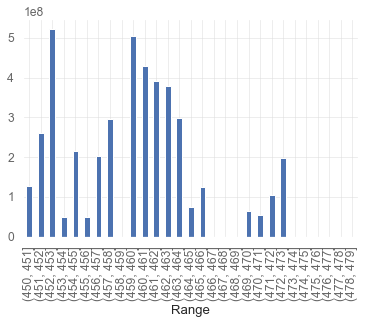

In [112]:
volumeonPriceintervalFC(df=FetchedSpy,x=1,n=450,m=480)

In [113]:
type(FetchedSpy['Volume'][0])

numpy.int64

<AxesSubplot:xlabel='Range'>

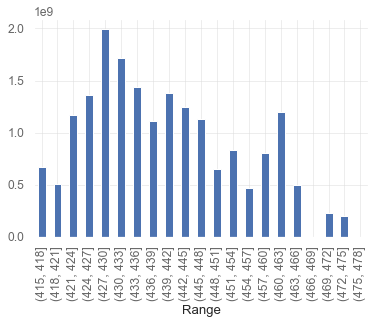

In [114]:
binn=np.arange(25,480,3).tolist()
binn
result=pd.cut(FetchedSpy['Close'],bins=binn)
result
FetchedSpy['Range']=result
plott=FetchedSpy.groupby(['Range']).sum()['Volume'][130:]
plott.plot(kind='bar')

In [115]:
labelsBY5=[]

In [116]:
volumeOverpricelabelsbyUnit10=pd.cut(volumefeedMaxperiod['Close'],bins=byunit10)
volumeOverpricelabelsbyUnit10

0         (20.0, 30.0]
1         (20.0, 30.0]
2         (20.0, 30.0]
3         (20.0, 30.0]
4         (20.0, 30.0]
             ...      
7083    (470.0, 480.0]
7084    (470.0, 480.0]
7085    (470.0, 480.0]
7086    (470.0, 480.0]
7087    (470.0, 480.0]
Name: Close, Length: 7088, dtype: category
Categories (48, interval[float64, right]): [(0.0, 10.0] < (10.0, 20.0] < (20.0, 30.0] < (30.0, 40.0] ... (440.0, 450.0] < (450.0, 460.0] < (460.0, 470.0] < (470.0, 480.0]]

In [117]:
volumeOverpricelabelsbyUnit10df=volumefeedMaxperiod.copy()
volumeOverpricelabelsbyUnit10df['StockRange']=volumeOverpricelabelsbyUnit10
volumeOverpricelabelsbyUnit10df

Close    Volume      StockRange
0      25.027716    378100    (20.0, 30.0]
1      25.045723    210900    (20.0, 30.0]
2      25.063745    374800    (20.0, 30.0]
3      25.117802     34900    (20.0, 30.0]
4      25.145918     62600    (20.0, 30.0]
...          ...       ...             ...
7083  471.411896  47274600  (470.0, 480.0]
7084  471.797485  56808600  (470.0, 480.0]
7085  472.014954  54503000  (470.0, 480.0]
7086  472.084137  71178700  (470.0, 480.0]
7087  472.242310  72668200  (470.0, 480.0]

[7088 rows x 3 columns]

<AxesSubplot:xlabel='StockRange'>

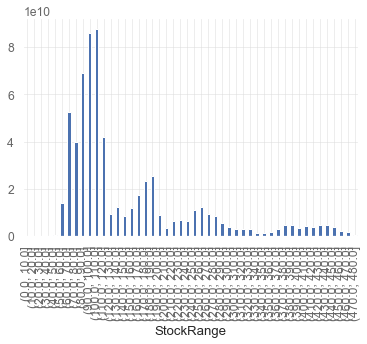

In [118]:
voulumeoverPriceUnit10=volumeOverpricelabelsbyUnit10df.groupby(["StockRange"]).sum()['Volume']
voulumeoverPriceUnit10.plot(kind='bar')

In [119]:
len(voulumeoverPriceUnit10)

48

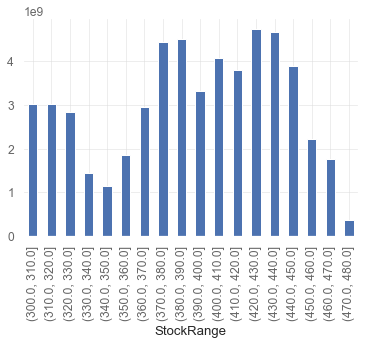

In [120]:
closerlookunitby10graph=voulumeoverPriceUnit10[30:].plot(kind="bar")

In [121]:

volumeOverpricelabelsbyUnit10=pd.cut(volumefeedMaxperiod['Close'],bins=byunit10)

In [122]:
#looking closer


In [123]:
df2022=spy.history(start='2022-01-01',end='2022-12-30', rounding=True) # note here rounding =true to give to cents
df2022

Open    High     Low   Close     Volume  \
Date                                                                   
2022-01-03 00:00:00-05:00  470.85  472.38  468.43  472.24   72668200   
2022-01-04 00:00:00-05:00  473.74  474.49  470.14  472.08   71178700   
2022-01-05 00:00:00-05:00  471.70  472.51  462.92  463.02  104538900   
2022-01-06 00:00:00-05:00  462.53  465.43  460.10  462.58   86858900   
2022-01-07 00:00:00-05:00  462.59  463.83  459.33  460.76   85111600   
...                           ...     ...     ...     ...        ...   
2022-11-28 00:00:00-05:00  399.09  400.81  395.11  395.91   67881600   
2022-11-29 00:00:00-05:00  396.05  397.30  393.30  395.23   52310000   
2022-11-30 00:00:00-05:00  395.49  407.68  393.48  407.68  144566700   
2022-12-01 00:00:00-05:00  408.77  410.00  404.75  407.38   76398200   
2022-12-02 00:00:00-05:00  402.25  407.86  402.14  406.91   85273900   

                           Dividends  Stock Splits  
Date                                                
2022-01-03 00:00:00-05:00        0.0             0  
2022-01-04 00:00:00-05:00        0.0             0  
2022-01-05 00:00:00-05:00        0.0             0  
2022-01-06 00:00:00-05:00        0.0             0  
2022-01-07 00:00:00-05:00        0.0             0  
...                              ...           ...  
2022-11-28 00:00:00-05:00        0.0             0  
2022-11-29 00:00:00-05:00        0.0             0  
2022-11-30 00:00:00-05:00        0.0             0  
2022-12-01 00:00:00-05:00        0.0             0  
2022-12-02 00:00:00-05:00        0.0             0  

[232 rows x 7 columns]

In [124]:
profileMaxPeriod=ProfileReport(FetchedSpy,title="MaxPeriodReport")
profileMaxPeriod

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [125]:
import matplotlib.pyplot as plt

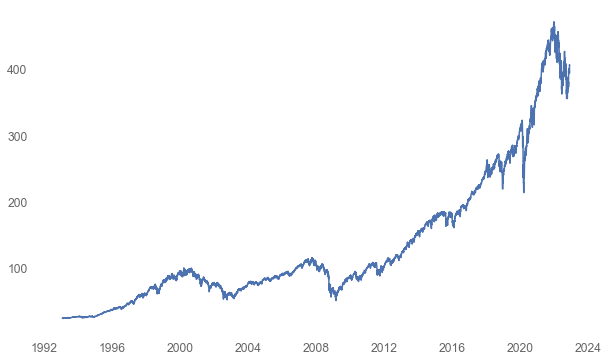

In [126]:

plt.figure(figsize=(10,6))
performance=plt.plot(FetchedSpy['Close'])
plt.grid()
plt.show()

In [127]:
def givemeachart(input,start,end): # is this the dependency not within the function?# notice need to put diff quotation on it
    ticker=yf.Ticker(input)
    Fetched=ticker.history(start=start,end=end)
    plt.figure(figsize=(10,6))
    performance=plt.plot(Fetched['Close'])
    plt.grid()
    plt.show()
# looking for the documentary to define the functions

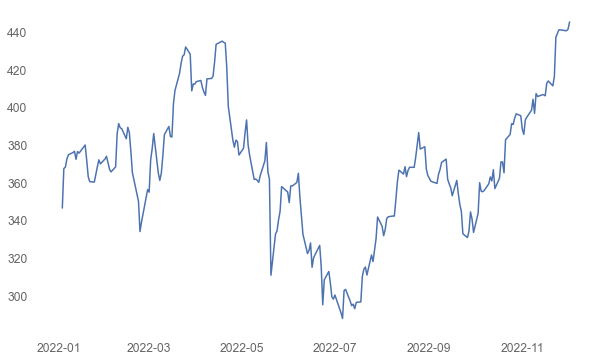

In [128]:
graph2022=givemeachart("de",'2022-01-01','2022-12-30')

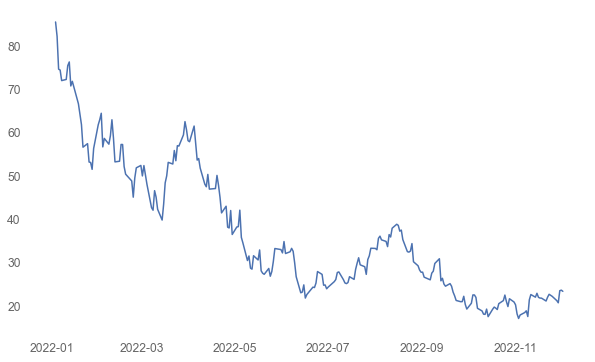

In [129]:
graphTqqq=givemeachart("TQQQ",'2022-01-01','2022-12-30')

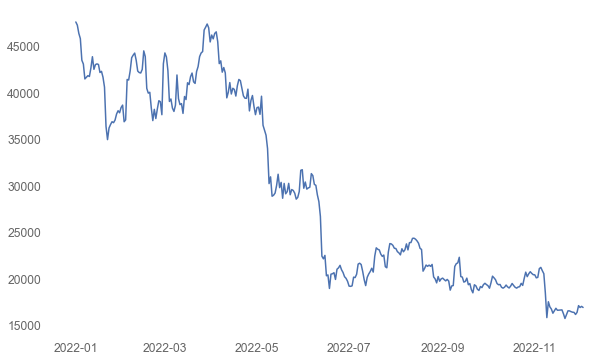

In [130]:
Bitcoin=givemeachart('BTC-USD','2022-01-01','2022-12-30')

In [131]:
#faster way to do things
# from pandas_datareader import data as pdr

# import yfinance as yf
# yf.pdr_override() # <== that's all it takes :-)

# # download dataframe
# data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")

In [132]:
# note we can request the data from yahoo finace by per minutes
qqq=yf.Ticker('QQQ')
df=qqq.history(period='max',actions=False,rounding=True,interval='15m')
df

- QQQ: 15m data not available for startTime=921076200 and endTime=1670082697. The requested range must be within the last 60 days.


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []

In [133]:
df15min=qqq.history(period='60d',actions=False,rounding=True,interval='15m',prepost=False)
df15min

Open    High     Low   Close   Volume
Datetime                                                          
2022-09-09 09:30:00-04:00  302.83  304.35  302.79  303.51  5944379
2022-09-09 09:45:00-04:00  303.47  304.90  303.06  304.86  2752904
2022-09-09 10:00:00-04:00  304.91  305.77  304.71  305.27  3991828
2022-09-09 10:15:00-04:00  305.27  305.90  304.50  305.44  2416301
2022-09-09 10:30:00-04:00  305.44  306.48  305.12  306.30  2423781
...                           ...     ...     ...     ...      ...
2022-12-02 15:00:00-05:00  292.02  293.18  291.86  293.14  1897953
2022-12-02 15:15:00-05:00  293.13  293.45  292.33  292.58  1710061
2022-12-02 15:30:00-05:00  292.58  292.66  291.75  292.02  1385698
2022-12-02 15:45:00-05:00  292.00  292.74  291.61  292.61  2696264
2022-12-02 16:00:00-05:00  292.55  292.55  292.55  292.55        0

[1550 rows x 5 columns]

In [134]:
df15min=qqq.history(period='60d',actions=False,rounding=True,interval='15m',prepost=False,start="2022-12-01",end='2022-01-01')
df15min

- QQQ: Invalid input - start date cannot be after end date. startDate = 1669870800, endDate = 1641013200


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []

In [135]:
df15min=qqq.history(period='60d',actions=False,rounding=True,interval='15m',prepost=False)
df15min

Open    High     Low   Close   Volume
Datetime                                                          
2022-09-09 09:30:00-04:00  302.83  304.26  302.79  303.51  5944379
2022-09-09 09:45:00-04:00  303.18  304.90  303.17  304.86  2752904
2022-09-09 10:00:00-04:00  304.91  305.77  304.71  305.27  3991828
2022-09-09 10:15:00-04:00  305.27  305.90  304.50  305.44  2416301
2022-09-09 10:30:00-04:00  305.44  306.48  305.12  306.30  2423781
...                           ...     ...     ...     ...      ...
2022-12-02 15:00:00-05:00  292.02  293.18  291.86  293.14  1897953
2022-12-02 15:15:00-05:00  293.13  293.45  292.33  292.58  1710061
2022-12-02 15:30:00-05:00  292.58  292.66  291.75  292.02  1385698
2022-12-02 15:45:00-05:00  292.00  292.74  291.61  292.61  2696264
2022-12-02 16:00:00-05:00  292.55  292.55  292.55  292.55        0

[1550 rows x 5 columns]

In [136]:
df15min.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1550 entries, 2022-09-09 09:30:00-04:00 to 2022-12-02 16:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1550 non-null   float64
 1   High    1550 non-null   float64
 2   Low     1550 non-null   float64
 3   Close   1550 non-null   float64
 4   Volume  1550 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 72.7 KB


In [137]:
# note it give the index loop through time

In [138]:
#discover it is a 
type(df15min.copy().reset_index()['Datetime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [139]:
4
# stack overflow

# First, make sure your TIMESTAMP column is a datetime instead of a string (e.g. df['TIMESTAMP'] = pd.to_datetime(df.TIMESTAMP)).

# Next, use this column as the index of the dataframe. To make this permanent, df.set_index('TIMESTAMP, inplace=True)`.

# Now you can resample for any given frequency (e.g. 30min) and use different methods of aggregation such as sum, mean (the default), a lambda function, etc).

# Optionally, you can add .fillna(0) to replace the NaNs with zeros.

4

In [140]:
ploTSeries=df15min['Close']
ploTSeries

Datetime
2022-09-09 09:30:00-04:00    303.51
2022-09-09 09:45:00-04:00    304.86
2022-09-09 10:00:00-04:00    305.27
2022-09-09 10:15:00-04:00    305.44
2022-09-09 10:30:00-04:00    306.30
                              ...  
2022-12-02 15:00:00-05:00    293.14
2022-12-02 15:15:00-05:00    292.58
2022-12-02 15:30:00-05:00    292.02
2022-12-02 15:45:00-05:00    292.61
2022-12-02 16:00:00-05:00    292.55
Name: Close, Length: 1550, dtype: float64

<AxesSubplot:title={'center':'QQQ15min'}, xlabel='Datetime'>

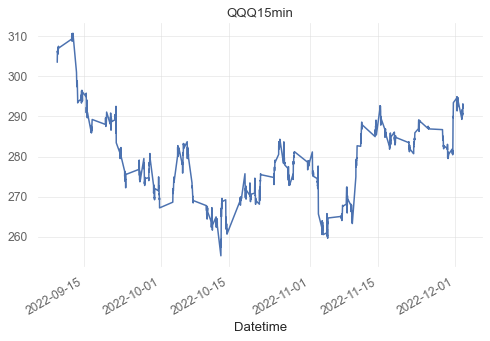

In [141]:
plt.figure(figsize=(8,5))
ploTSeries.plot(title='QQQ15min')

In [142]:
YMDformatSPYadj

NameError: name 'YMDformatSPYadj' is not defined

In [143]:
howmanydayfromtoday=(np.arange(0,len(YMDformatSPYadj))+1).tolist()
howmanydayfromtoday=howmanydayfromtoday[::-1]
howmanydayfromtoday# no we can construct it for the day we wanna

NameError: name 'YMDformatSPYadj' is not defined

In [ ]:
YMDformatSPYadj['Retriveday']=howmanydayfromtoday
Yeartodayframe=YMDformatSPYadj.sort_values(by='Retriveday',ascending=True)
Yeartodayframe

In [ ]:
resetdf=YMDformatSPYadj.reset_index()
resetdf

In [ ]:
spy=yf.Ticker('SPY')
type(spy)

In [ ]:
time in df.reset_index()['Date'] if 

In [156]:
finalize15min=[]
for i,day in enumerate(Yeartodayframe.reset_index()['Date'],start=1):
#          print(i,day)
    if (i%60==0 & i>=59):
        start=resetdf.iloc[i-59,0].strftime("%Y-%m-%d")
        end=resetdf.iloc[i,0].strftime("%Y-%m-%d")
        df=spy.history(start=start,end=end,actions=False,rounding=True,interval='15m',prepost=False)
        #?loop through df append each raw
        #? append each columns to list and let overwrite?
        #any better way to do ?D

        


        
        


# df15mins=spy.history(start='2022-10-30',end='2022-11-30',actions=False,rounding=True,interval='15m',prepost=False)
# df15mins

NameError: name 'Yeartodayframe' is not defined

In [ ]:
df15mins=qqq.history(period="90d",actions=False,rounding=True,interval='15m',prepost=False)

In [ ]:
current_date=datetime.now()
current_date

In [ ]:
df15mins.index.strftime("%Y-%m-%d")[0]

In [ ]:
# lower level data for deeper loop, can be start data=x x from a range listed

# Option Section

In [ ]:
Experisionlist=spy.options
Experisionlist

In [ ]:
Experisionlist[0]

In [ ]:
puts=options.puts
puts

In [ ]:
options.calls.info()

In [ ]:
options.puts.info()

In [ ]:

for index,price in enumerate(c):
    if ((price%10==0) & (price>=10)):
        labelsBY5.append(f"less than {price}")
labelsBY5
    
        
           


            
        